In [1]:
!pip install --upgrade git+https://github.com/GeoBigData/sensortools.git@master -q

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from gbdxtools import Interface
gbdx = Interface()

# DG Sensor Tools
from sensortools import sensortools
st = sensortools()

# Inputs

In [3]:
# GB of data equates to how many square kilometers of imagery?
gb = 100

# Square kilometers of imagery equates to how many GB of data?
km2 = 50

# What is the AOI? We'll use this in an image catalog search. And map out relative areas. Just needs to be WKT.
aoi = "POLYGON((-111.8 40.3,-110.2 40.3,-110.2 39.5,-111.8 39.5,-111.8 40.3))"

# What is the start date of your image search?
start_date = '2010-01-01T00:00:00.000Z'

# What is the end date of your image search?
end_date = '2014-01-01T00:00:00.000Z'

# Any filters you'd like to add to the image search? 
filters = ['sensorPlatformName<>LANDSAT08']

### Filter Examples

filters = [
'cloudCover < 10',
'offNadirAngle < 15',
'imageBands = Pan_MS1_MS2'
]

In [4]:
# Convert GB to km2, return for all sensors as pandas df
# if you know the GB of the account, then determine area coverage
st.gb_to_km2(gb=100)

,Sensor,Resolution (m),Band Count,Area (km2)
0,GE01_Pan,0.41,1,4512
1,GE01_MS,1.64,4,18049
2,WV01_Pan,0.50,1,6710
3,WV02_Pan,0.46,1,5680
4,WV02_MS,1.85,8,11484
5,WV03_Pan,0.31,1,2579
6,WV03_MS,1.24,8,5159
7,WV03_SWIR,3.70,8,45936
8,WV04_Pan,0.31,1,2579
9,WV04_MS,1.24,4,10318


In [5]:
# Convert km2 to GB, return for all sensors as pandas df
# if you know the km2 requested, how many GB does this translate to? Can determine tier 
st.km2_to_gb(km2=50)

,Sensor,Resolution (m),Band Count,GB
0,GE01_Pan,0.41,1,1.10806
1,GE01_MS,1.64,4,0.277014
2,WV01_Pan,0.50,1,0.745058
3,WV02_Pan,0.46,1,0.880267
4,WV02_MS,1.85,8,0.435388
5,WV03_Pan,0.31,1,1.93824
6,WV03_MS,1.24,8,0.969118
7,WV03_SWIR,3.70,8,0.108847
8,WV04_Pan,0.31,1,1.93824
9,WV04_MS,1.24,4,0.484559


In [6]:
# How does sensor GB translate to area on a map? 
# change the GB allotment and see the extent coverage for each sensor
# change the initial location by inputing aoi=[lat, lon] into the function (otherwise defaults to Denver, CO)
# or simply feed in the WKT polygon aoi from the main inputs and a centroid will be calculated
st.mapGB(gb=100)

In [7]:
# showing another location
st.mapGB(gb=100, aoi=[35.68, 139.69])

In [8]:
# lets map the AOI
st.mapAOI(aoi)

In [9]:
# or we can feed in the AOI, which initializes our map at the center of the AOI 
st.mapGB(gb=100, aoi=aoi)

In [10]:
# Perhaps we know the AOI extent, so what is the AOI's area?
# returns in km2 
st.aoiArea(aoi)

12144.284854656915

In [11]:
# we can use the AOI area to see how this translates to GB of imagery
st.km2_to_gb(st.aoiArea(aoi))

,Sensor,Resolution (m),Band Count,GB
0,GE01_Pan,0.41,1,269.131
1,GE01_MS,1.64,4,67.2828
2,WV01_Pan,0.50,1,180.964
3,WV02_Pan,0.46,1,213.804
4,WV02_MS,1.85,8,105.75
5,WV03_Pan,0.31,1,470.77
6,WV03_MS,1.24,8,235.385
7,WV03_SWIR,3.70,8,26.4374
8,WV04_Pan,0.31,1,470.77
9,WV04_MS,1.24,4,117.692


In [12]:
# Perhaps we have a specific datetime range in mind, then we need to conduct image search...
# we may not have the coverage, check out what we have and return the results in something we can parse
results = gbdx.catalog.search(searchAreaWkt=aoi, startDate=start_date, endDate=end_date, filters=filters)

In [13]:
# We must format our search results into something that we can plot and use
df = st.formatSearchResults(results, aoi=aoi)
# take a look at the formatted results. This can be use by itself, or use built-in plot (below)
# .head() just returns the top 5 of the results, there are many more! 
df.head()

,Sensor,Date,Cloud Cover,Off Nadir Angle,Sun Elevation,Footprint WKT,Footprint AOI Inter Percent,x
2010-01-05 18:14:14.446,QUICKBIRD02,2010-01-05 18:14:14.446,17,24.106699,25.488941,"MULTIPOLYGON(((-110.4067753 40.01061926, -110....",3.653155,0
2010-01-06 18:33:25.549,WORLDVIEW01,2010-01-06 18:33:25.549,99,16.899406,26.977633,"MULTIPOLYGON(((-110.7061659 40.02044999, -110....",8.610948,1
2010-01-15 18:40:16.177,WORLDVIEW02,2010-01-15 18:40:16.177,1,22.383213,27.186440,"MULTIPOLYGON(((-111.9967955 40.87773483, -111....",0.037705,2
2010-01-15 18:40:31.777,WORLDVIEW02,2010-01-15 18:40:31.777,3,27.274885,27.204473,"MULTIPOLYGON(((-112.0028672 40.87857668, -111....",0.165196,3
2010-01-21 18:20:57.786,WORLDVIEW02,2010-01-21 18:20:57.786,99,19.470659,28.574598,"MULTIPOLYGON(((-111.9834202 39.59092321, -111....",0.238414,4


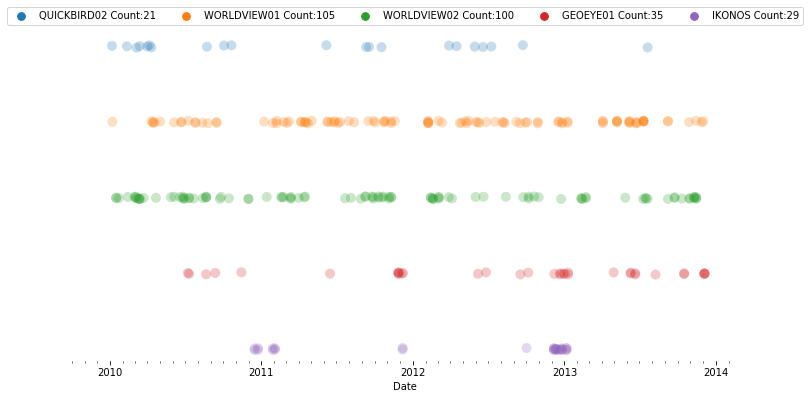

In [15]:
# Plot the results of our image search
# Legend shows counts of imagery found by sensor, dots show coverage over time 
st.searchScatterPlot(df)

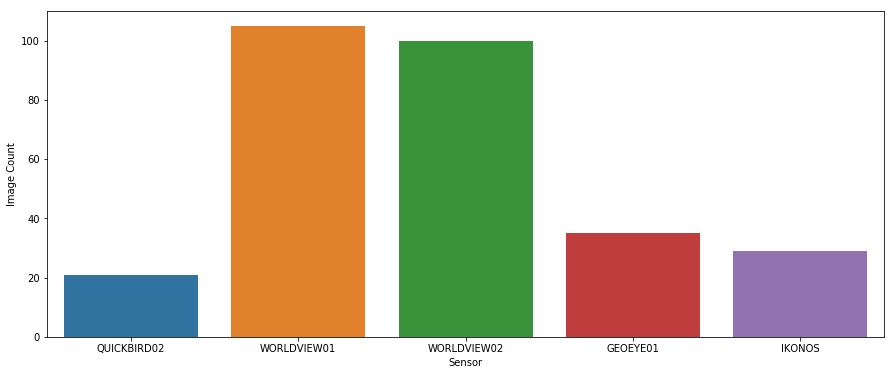

In [16]:
# barplot showing counts of imagery for AOI
st.searchBarPlot(df)

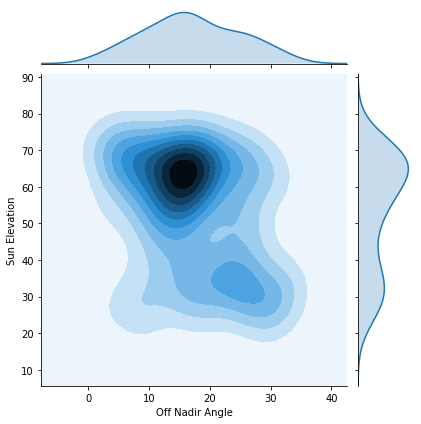

In [22]:
# in some cases we want to see more details of the properties of the image coverage we have
# searchVarPlot allows you to compare two variables for images returned in search 
# you can optionally feed in one sensor to focus in on its results
# in the plot below, you can see the majority of our WV2 images have an off nadir angle between 10-20
# and a sun elevation between 60-70
st.searchVarPlot(df, var1='Off Nadir Angle', var2='Sun Elevation', sensor='WORLDVIEW01')

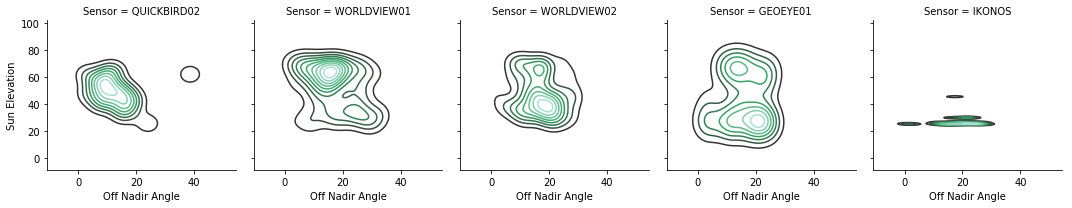

In [19]:
# or, we can compare all sensors together at once 
st.searchSensorComparePlot(df, var1='Off Nadir Angle', var2='Sun Elevation')

In [23]:
# calculate the AOI percent coverage by the search results footprints 
# further, subeset the search results to just include images with 0 cloud cover
st.aoiFootprintPctCoverage(df[(df['Cloud Cover']==0) & (df['Sensor']=='WORLDVIEW01')], aoi)

88.49197050172624

In [27]:
# show the coverage of the footprints over the AOI
# further, subeset the search results to just include images with 0 cloud cover
st.mapSearchFootprintsAOI(df[(df['Cloud Cover']==0) & (df['Sensor']=='WORLDVIEW01')], aoi)

# Advanced summaries for the search results

In [28]:
# return dataframe with count of sensors between date
df.groupby(['Sensor']).count()

,Date,Cloud Cover,Off Nadir Angle,Sun Elevation,Footprint WKT,Footprint AOI Inter Percent,x
Sensor,,,,,,,
GEOEYE01,35,35,35,35,35,35,35
IKONOS,29,29,29,29,29,29,29
QUICKBIRD02,21,21,21,21,21,21,21
WORLDVIEW01,105,105,105,105,105,105,105
WORLDVIEW02,100,100,100,100,100,100,100


In [29]:
# taking a step further, how many images are available by sensor, year, and month? 
pd.DataFrame(df.groupby(['Sensor', df.index.year, df.index.month]).count().Date).head(20)

Date
Sensor                
GEOEYE01 2010 7      2
              8      1
              9      1
              11     1
         2011 6      1
              11     4
              12     2
         2012 6      2
              9      1
              10     1
              12     4
         2013 1      3
              4      1
              6      4
              8      1
              10     2
              12     4
IKONOS   2010 12     4
         2011 1      2
              2      2